In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
import plotly.offline as pyo

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\Rishabh\datasets\Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


Loading The Dataset Is Done!

# DATA UNDERSTANDING 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [4]:
n_rows, n_columns = df.shape

print("Total number of rows = ", n_rows)
print("Total number of columns = ", n_columns)

Total number of rows =  181458
Total number of columns =  17


In [5]:
columns_list = list(df.columns)
columns_list

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

# DATA CLEANING

In [6]:
# checking for null values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

The output shows that there are missing values in the dataset. Column 11 has 398 missing values. We can proceed with cleaning the data by handling these missing values.

In [7]:
# Dropping rows with missing values
df_cleaned = df.dropna()

# Checking the shape of the cleaned dataset
df_cleaned.shape

(181055, 17)

The cleaned dataset now has 181,055 rows and 17 columns after dropping rows with missing values. The data is now ready for further analysis.

In [8]:
# checking for null values
df_cleaned.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Data Distribution & Statistics

In [9]:
df = df_cleaned
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,181055.000000,181055.000000,181055.000000,181055.000000,181055.000000,1.810550e+05,1.810550e+05
mean,98260.619331,2020.583342,57.809969,1038.141173,29.107183,2.214370e+08,5.303982e+10
std,303.618629,2.991069,91.387237,8220.159471,14.892453,7.528927e+07,1.621873e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.830801e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.290973e+08,5.303303e+10
75%,98371.000000,2023.000000,75.000000,0.000000,42.000000,2.561379e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


Performed a geographical analysis of electric vehicle distribution by state and city

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by State and City to count the number of electric vehicles in each city
electric_vehicle_distribution = df.groupby(['State', 'City']).size().reset_index(name='Count')

# Plotting the distribution of electric vehicles by State and City
plt.figure(figsize=(100, 100))
sns.barplot(x='Count', y='City', hue='State', data=electric_vehicle_distribution)
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.title('Electric Vehicle Distribution by State and City')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

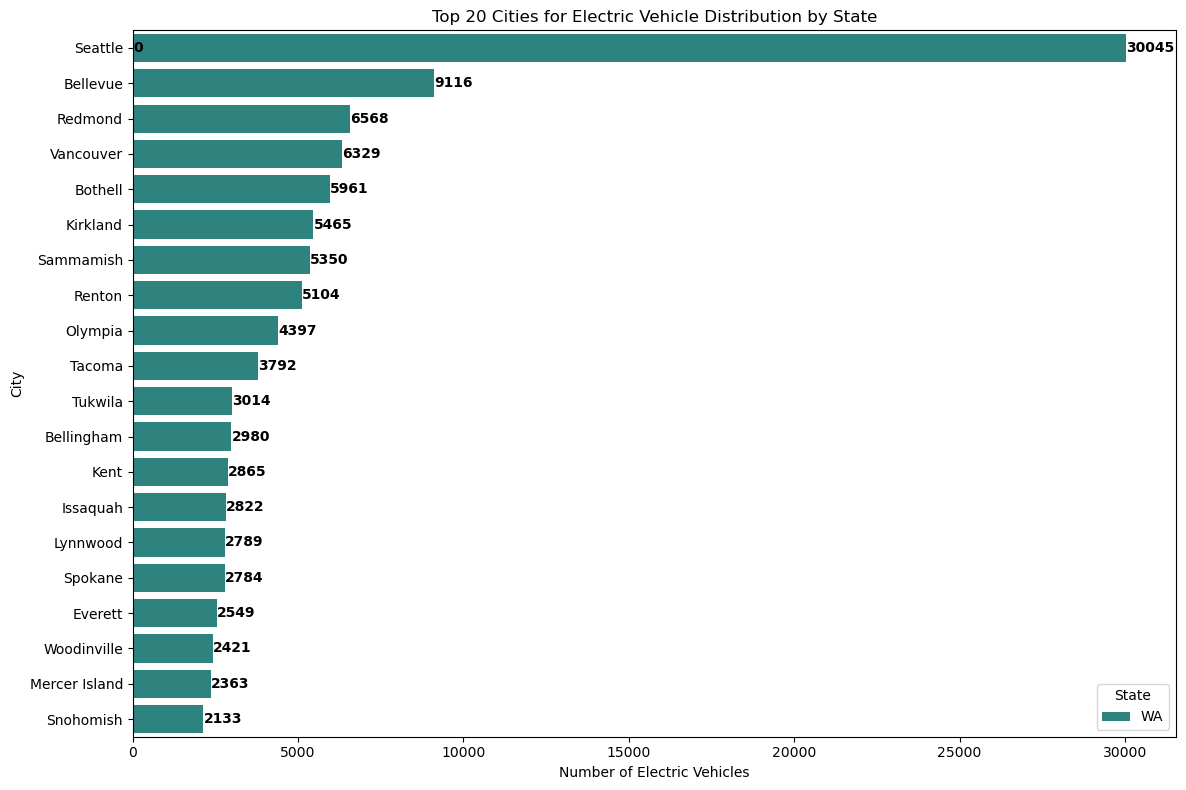

In [11]:


# Count the number of electric vehicles by state and city
ev_distribution = df.groupby(['State', 'City']).size().reset_index(name='Count')

# Sort the data for better visualization
ev_distribution_sorted = ev_distribution.sort_values(by='Count', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8), facecolor='white')
barplot = sns.barplot(x='Count', y='City', hue='State', data=ev_distribution_sorted, palette='viridis')
plt.title('Top 20 Cities for Electric Vehicle Distribution by State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.legend(title='State')

# Adding numbers on the bars with sky blue color and shifted to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

Insights:



The distribution of electric vehicles is not uniform across cities and states. 
Some cities have significantly higher numbers of electric vehicles, indicating potential hotspots for electric vehicle adoption.


The variation in electric vehicle counts across cities could be influenced by factors such as state policies, availability of charging infrastructure, and local incentives for electric vehicles.


States with multiple cities in the top 20 suggest a broader acceptance and infrastructure support for electric vehicles within those states.


This analysis helps in identifying key areas where electric vehicle adoption is more pronounced and where further infrastructure development could be beneficial.

# A breakdown of electric vehicle distribution by city and vehicle type for top 20

In [12]:
# Count the number of electric vehicles by city and electric vehicle type
ev_type_distribution = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Sort the data for better visualization
ev_type_distribution_sorted = ev_type_distribution.sort_values(by='Count', ascending=False)

# Display the head of the sorted dataframe
ev_type_distribution_sorted.head(20)

,City,Electric Vehicle Type,Count
654,Seattle,Battery Electric Vehicle (BEV),23961
47,Bellevue,Battery Electric Vehicle (BEV),7842
655,Seattle,Plug-in Hybrid Electric Vehicle (PHEV),6084
606,Redmond,Battery Electric Vehicle (BEV),5706
60,Bothell,Battery Electric Vehicle (BEV),5145
646,Sammamish,Battery Electric Vehicle (BEV),4672
788,Vancouver,Battery Electric Vehicle (BEV),4636
345,Kirkland,Battery Electric Vehicle (BEV),4625
608,Renton,Battery Electric Vehicle (BEV),3794
519,Olympia,Battery Electric Vehicle (BEV),3319
